In [1]:
import pandas as pd 
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

## EDA

Dataset Analysis Concrete Strength:-
* loading the dataset and checking out the dimensions, shape and the type of the parameters
* analysing the each attributes for the anomilies

In [2]:
dataset = pd.read_csv(r"D:\ML_ineuron_course\dataset\concrete_strength\data.csv")
dataset.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

In [3]:
dataset.shape
dataset.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [4]:
dataset.dtypes
print(dataset.isnull().sum())

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64


## Summary:

1. Total 9 features we have in dataset. in that the data types are already numeric, hence no conversion of datatypes was required.
2. All the features are linear in nature, but some features are skewed in nature.
3. there are no null values in any of the features, hence null value treatment not required.
4. "Strength" is the target variable, will do detailed analysis on that feature later.
5. values of the features are in different units, hence needs to be converted to the common type by preprocessors.
6. some of the features have zero values, it might be a default value hence leaving it as it is for now.
7. there could be some outliers in the data, have to do some treatment.

## Univariate Analysis:

In [5]:
dataset.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.400000        968.000000      779.500000    28.000000   
75%           10.200000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

          Strength  
count  1030.000000  
mean     35.817961  
std      16.705742  
min       2.330000  
25%      23.710000  
50%      34.445000  
75%      46.135000  
max      82.600000

In [6]:
dataset.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

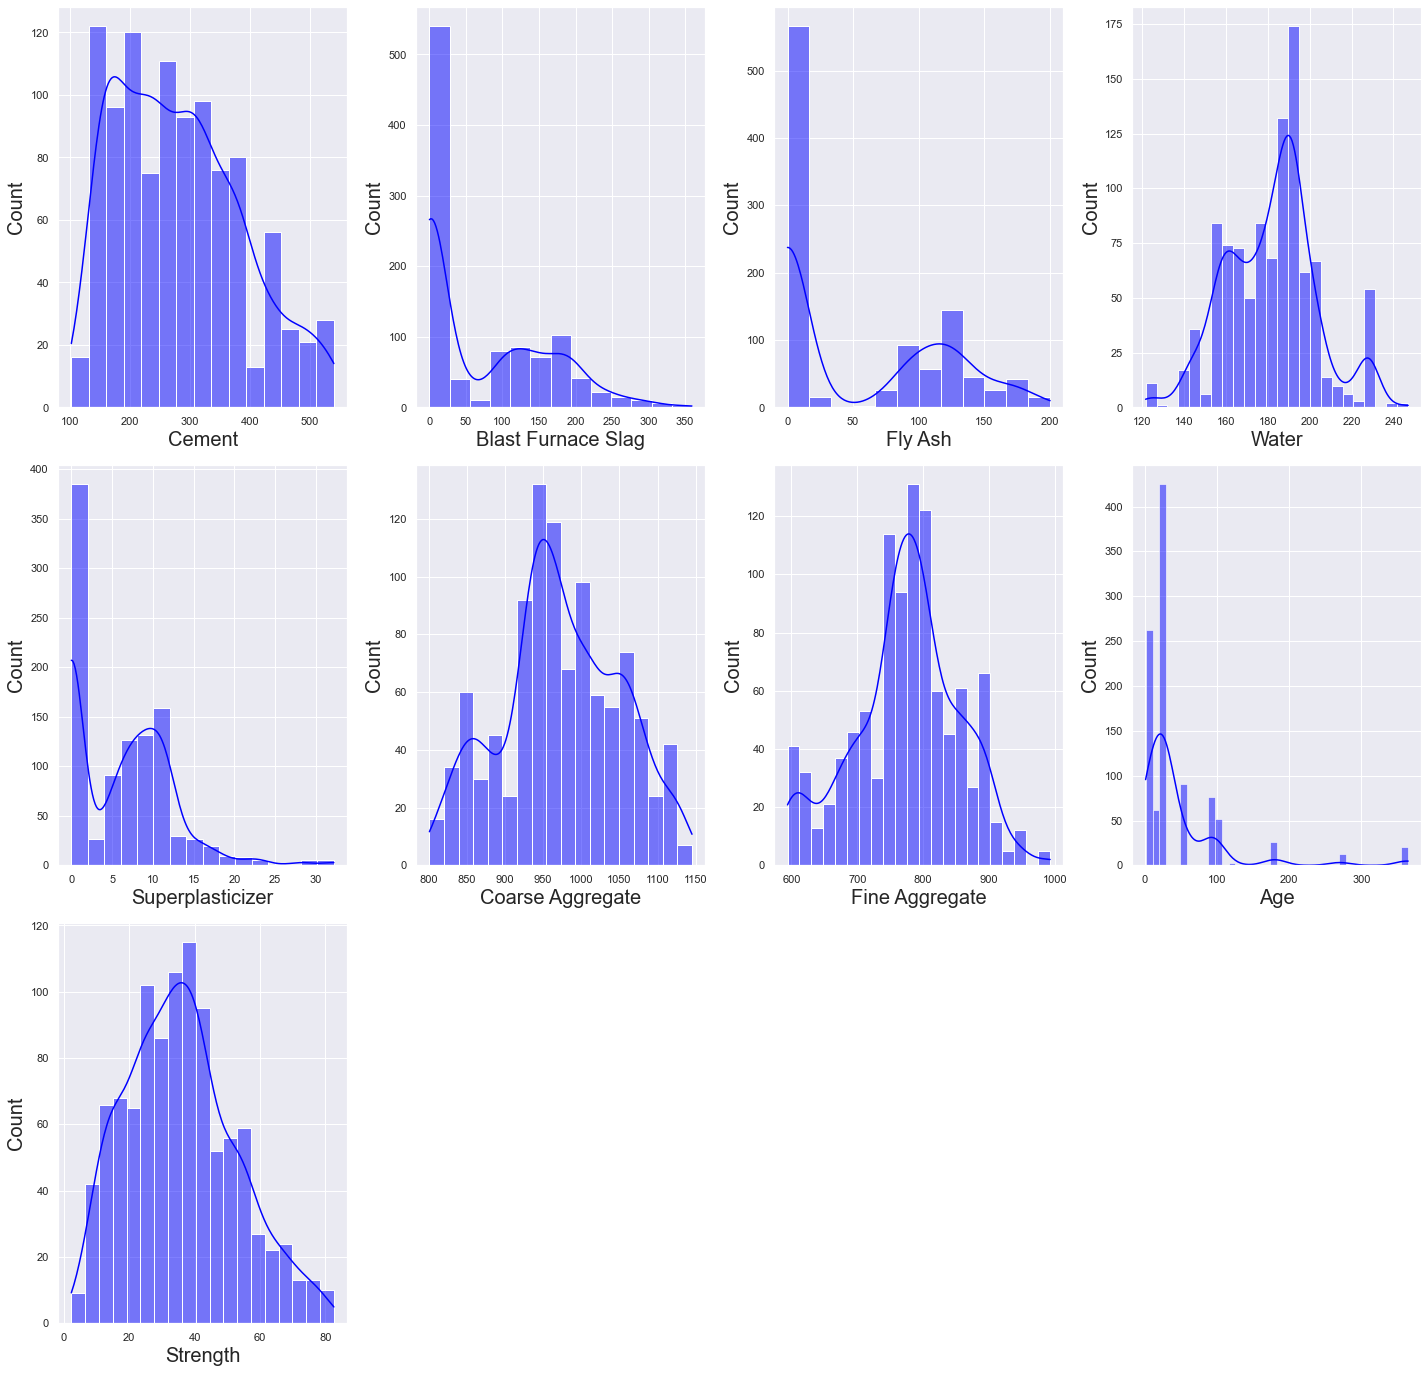

In [7]:
sns.set_theme(style='darkgrid', palette='deep')
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dataset.columns:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x = dataset[column], kde=True, color='blue')
        plt.xlabel(column, fontsize=20)
        plt.ylabel("Count", fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [10]:
## Dataset does not have any null values, but need to verify if 0.0 is actually repalced null value

zeros_feature = dataset.columns
for col in zeros_feature:
    print(f" Zero in {col} : {(dataset[col]==0).sum()}")

 Zero in Cement : 0
 Zero in Blast Furnace Slag : 471
 Zero in Fly Ash : 566
 Zero in Water : 0
 Zero in Superplasticizer : 379
 Zero in Coarse Aggregate : 0
 Zero in Fine Aggregate : 0
 Zero in Age : 0
 Zero in Strength : 0


## Observations:
1. from the 5 point summary it is clear that some features have very huge difference between their min, max and mean.
2. In distribution plot Blast Furnace Slag, Fly Ash, and Superplasticizer have a very large amount of zero values, this is might    be caused by sampling or measuring error.
3. we need to treat this large zero values by imputing with mean or median that we do in nexrt step.
4. Age feature have significant values but the distribution is right skewed and there is a huge differece b/w there min, max and    mean. might be this is caused by presence of outliers.


## Correlation or BiVariate Analysis:
* The correlaation matrix with heat map gives the visualisation of the atrribute relation.
* The pairplot shows the detailed view of the relation between each of the attributes.
* Followed by swarm or violin plot will share some details on the selecte attribute impacts.

In [17]:
## Correlation matrix 

dataset.corr(method='pearson')

Cement  Blast Furnace Slag   Fly Ash     Water  \
Cement              1.000000           -0.275216 -0.397467 -0.081587   
Blast Furnace Slag -0.275216            1.000000 -0.323580  0.107252   
Fly Ash            -0.397467           -0.323580  1.000000 -0.256984   
Water              -0.081587            0.107252 -0.256984  1.000000   
Superplasticizer    0.092386            0.043270  0.377503 -0.657533   
Coarse Aggregate   -0.109349           -0.283999 -0.009961 -0.182294   
Fine Aggregate     -0.222718           -0.281603  0.079108 -0.450661   
Age                 0.081946           -0.044246 -0.154371  0.277618   
Strength            0.497832            0.134829 -0.105755 -0.289633   

                    Superplasticizer  Coarse Aggregate  Fine Aggregate  \
Cement                      0.092386         -0.109349       -0.222718   
Blast Furnace Slag          0.043270         -0.283999       -0.281603   
Fly Ash                     0.377503         -0.009961        0.079108   
Water                      -0.657533         -0.182294       -0.450661   
Superplasticizer            1.000000         -0.265999        0.222691   
Coarse Aggregate           -0.265999          1.000000       -0.178481   
Fine Aggregate              0.222691         -0.178481        1.000000   
Age                        -0.192700         -0.003016       -0.156095   
Strength                    0.366079         -0.164935       -0.167241   

                         Age  Strength  
Cement              0.081946  0.497832  
Blast Furnace Slag -0.044246  0.134829  
Fly Ash            -0.154371 -0.105755  
Water               0.277618 -0.289633  
Superplasticizer   -0.192700  0.366079  
Coarse Aggregate   -0.003016 -0.164935  
Fine Aggregate     -0.156095 -0.167241  
Age                 1.000000  0.328873  
Strength            0.328873  1.000000

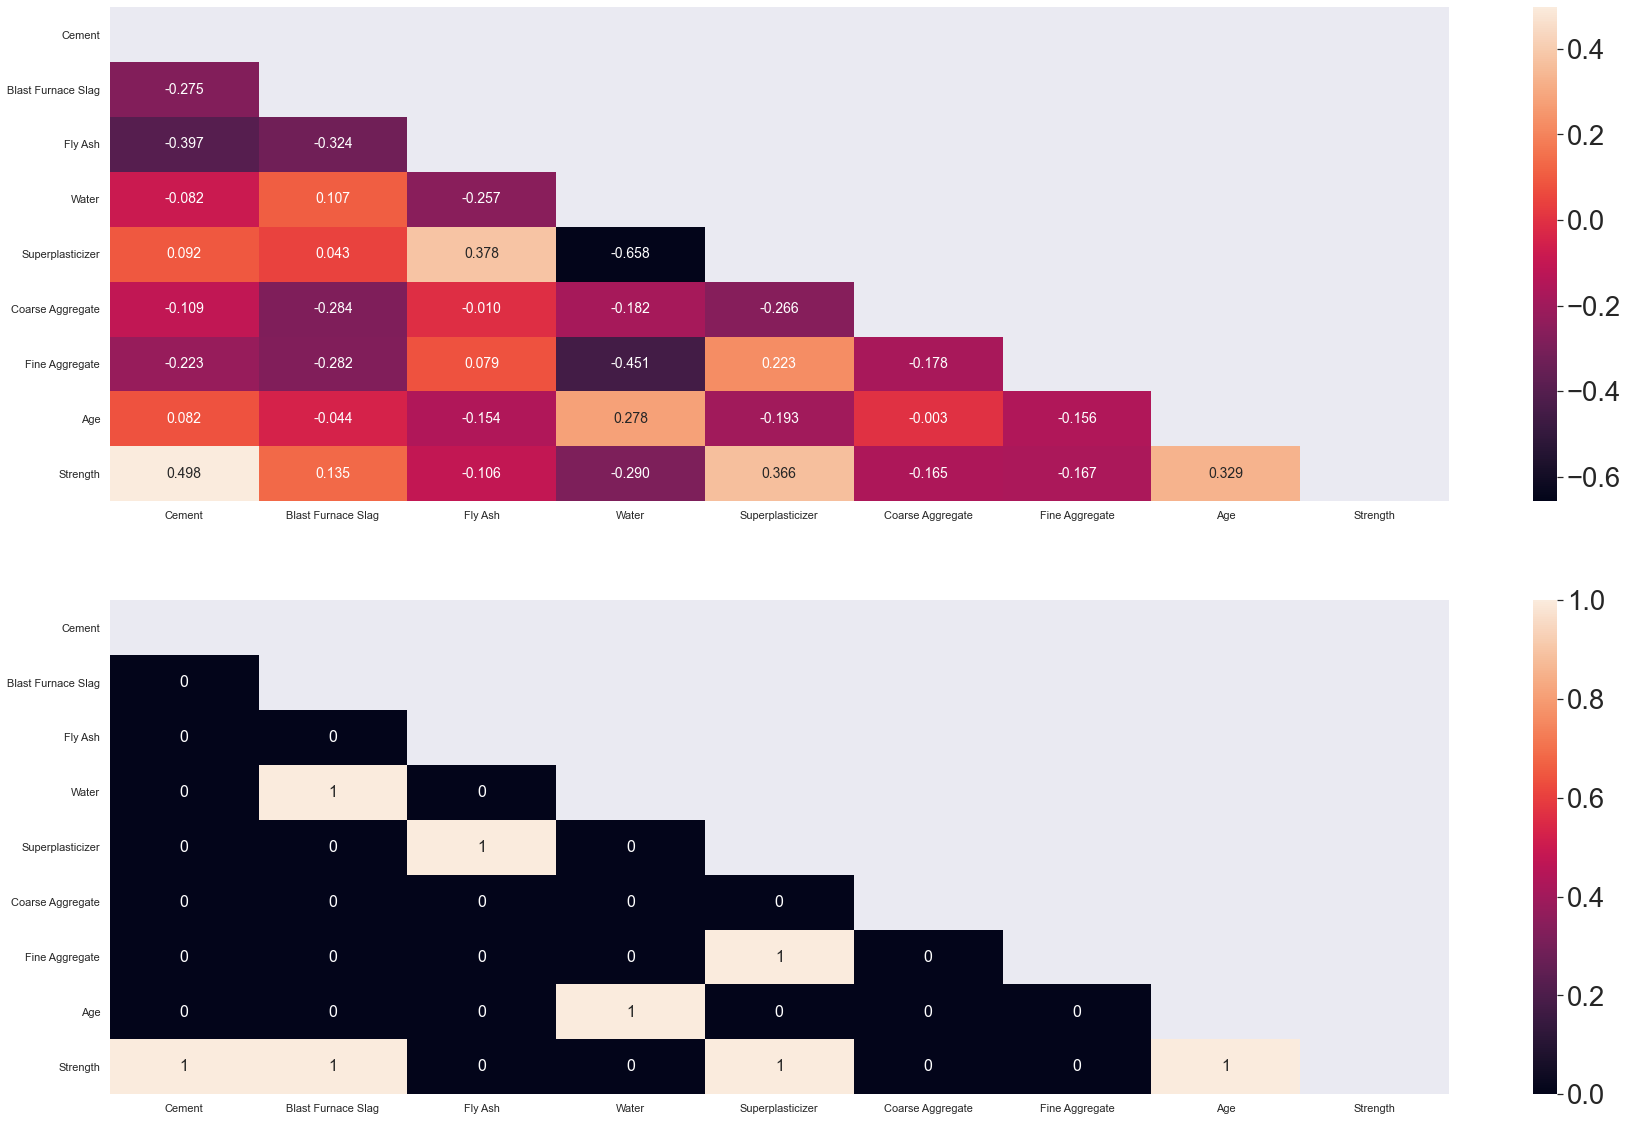

In [18]:
fig, axis = plt.subplots(2, 1, figsize=(30, 20), sharex=False)

sns.set(font_scale=2.5)

sns.heatmap(dataset.corr(), mask=np.triu(dataset.corr()),annot_kws={"size": 14}, annot=True,fmt='.3f',ax=axis[0])

corr_thresold=0.1
dataset_corr_threshold=dataset.corr()>corr_thresold

sns.heatmap(dataset_corr_threshold,mask=np.triu(dataset.corr()), annot_kws={"size": 16},annot=True,fmt='d',ax=axis[1])

plt.show()

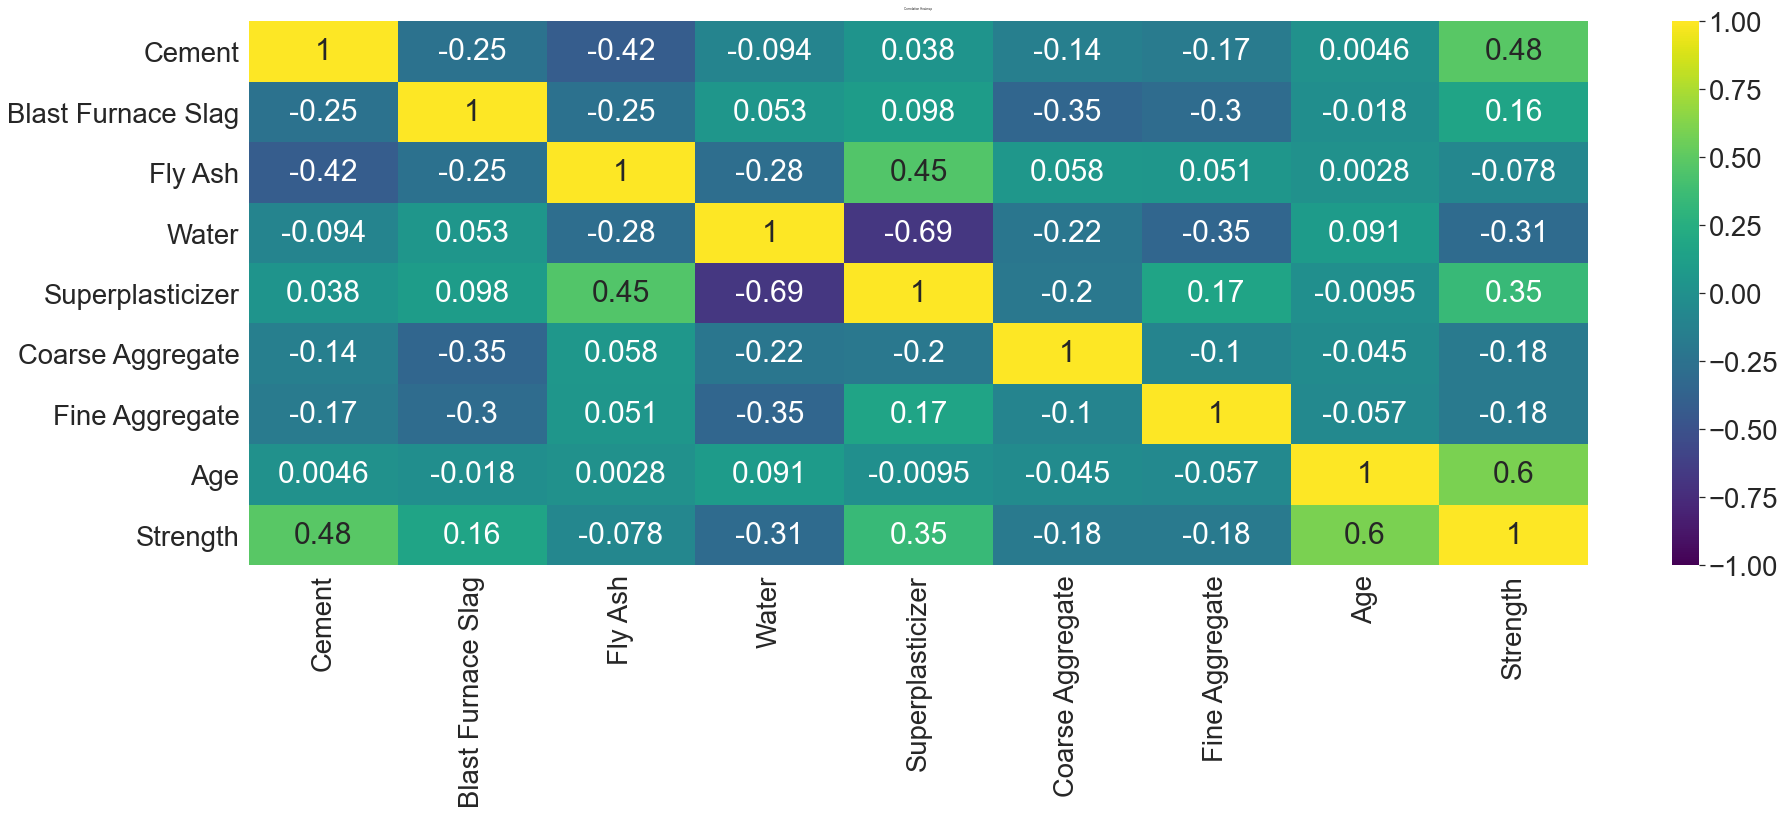

In [19]:
## Correlation map

plt.figure(figsize=(30,10))

heatmap = sns.heatmap(dataset.corr(method='spearman'), vmin=-1,vmax=1, annot=True, cmap='viridis')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':3}, pad=12)
plt.show()

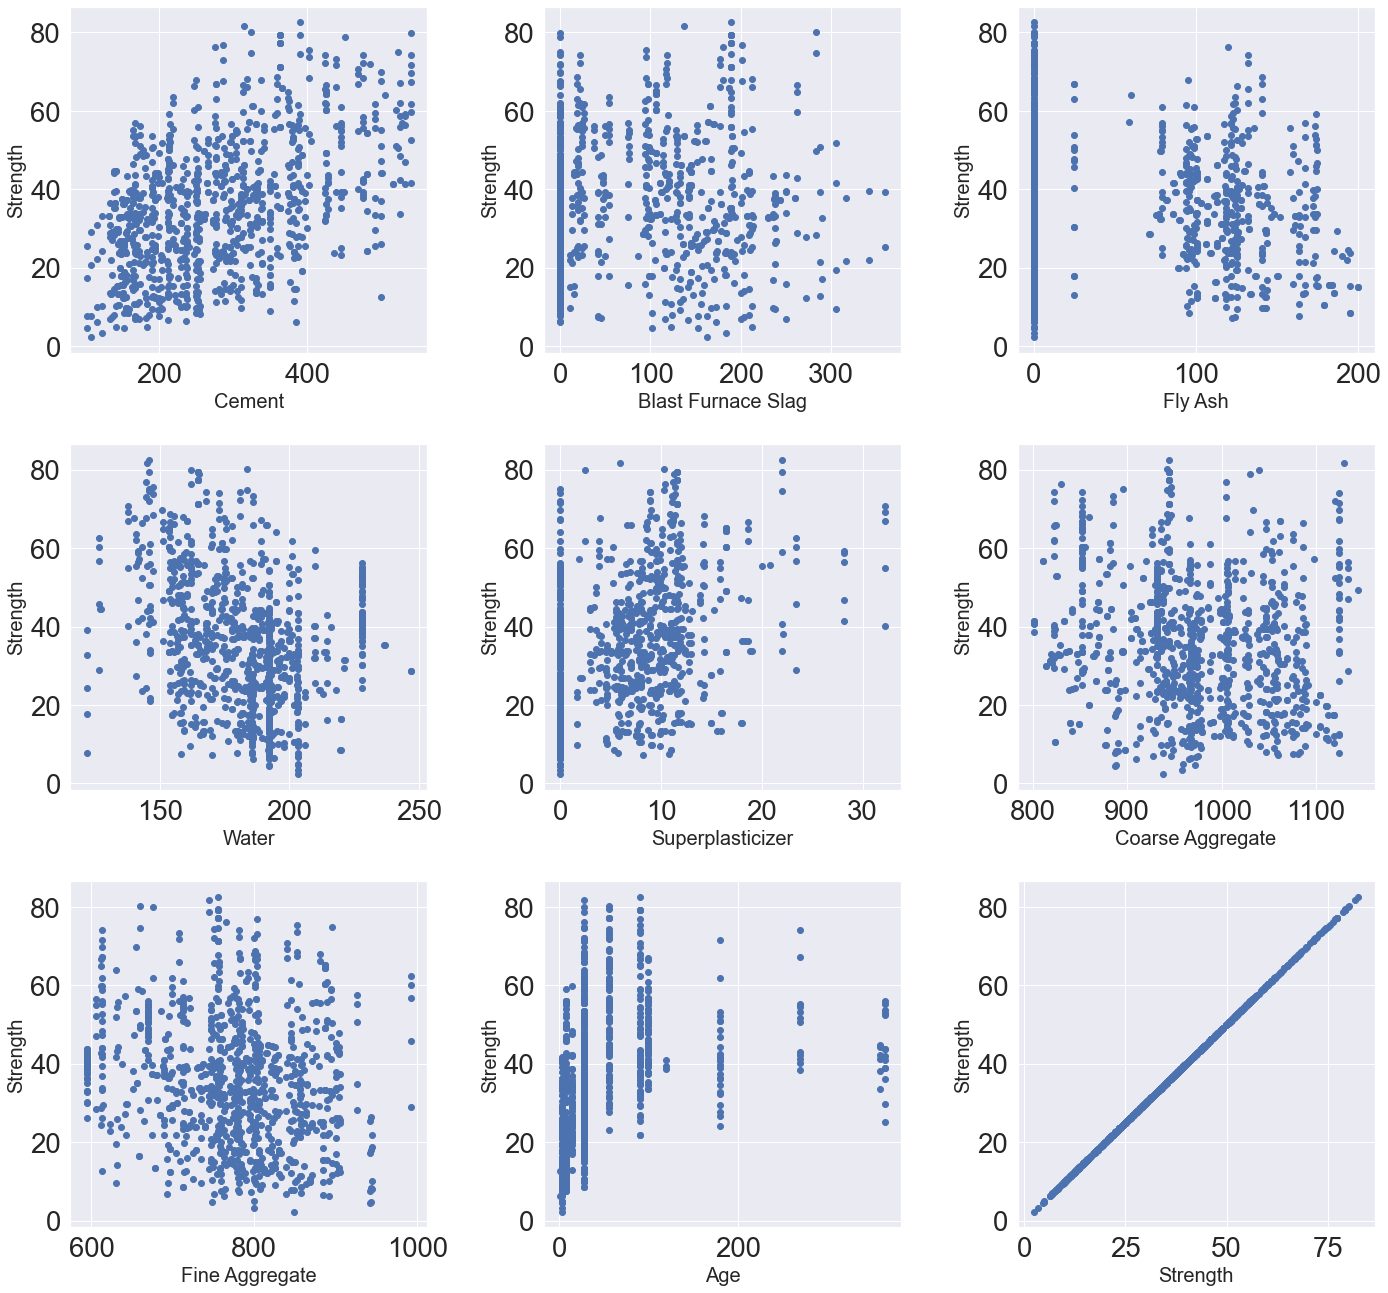

In [20]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in dataset.columns:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x = dataset[column], y = dataset['Strength'])
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Strength', fontsize=20)
    plotnumber+=1
plt.tight_layout()

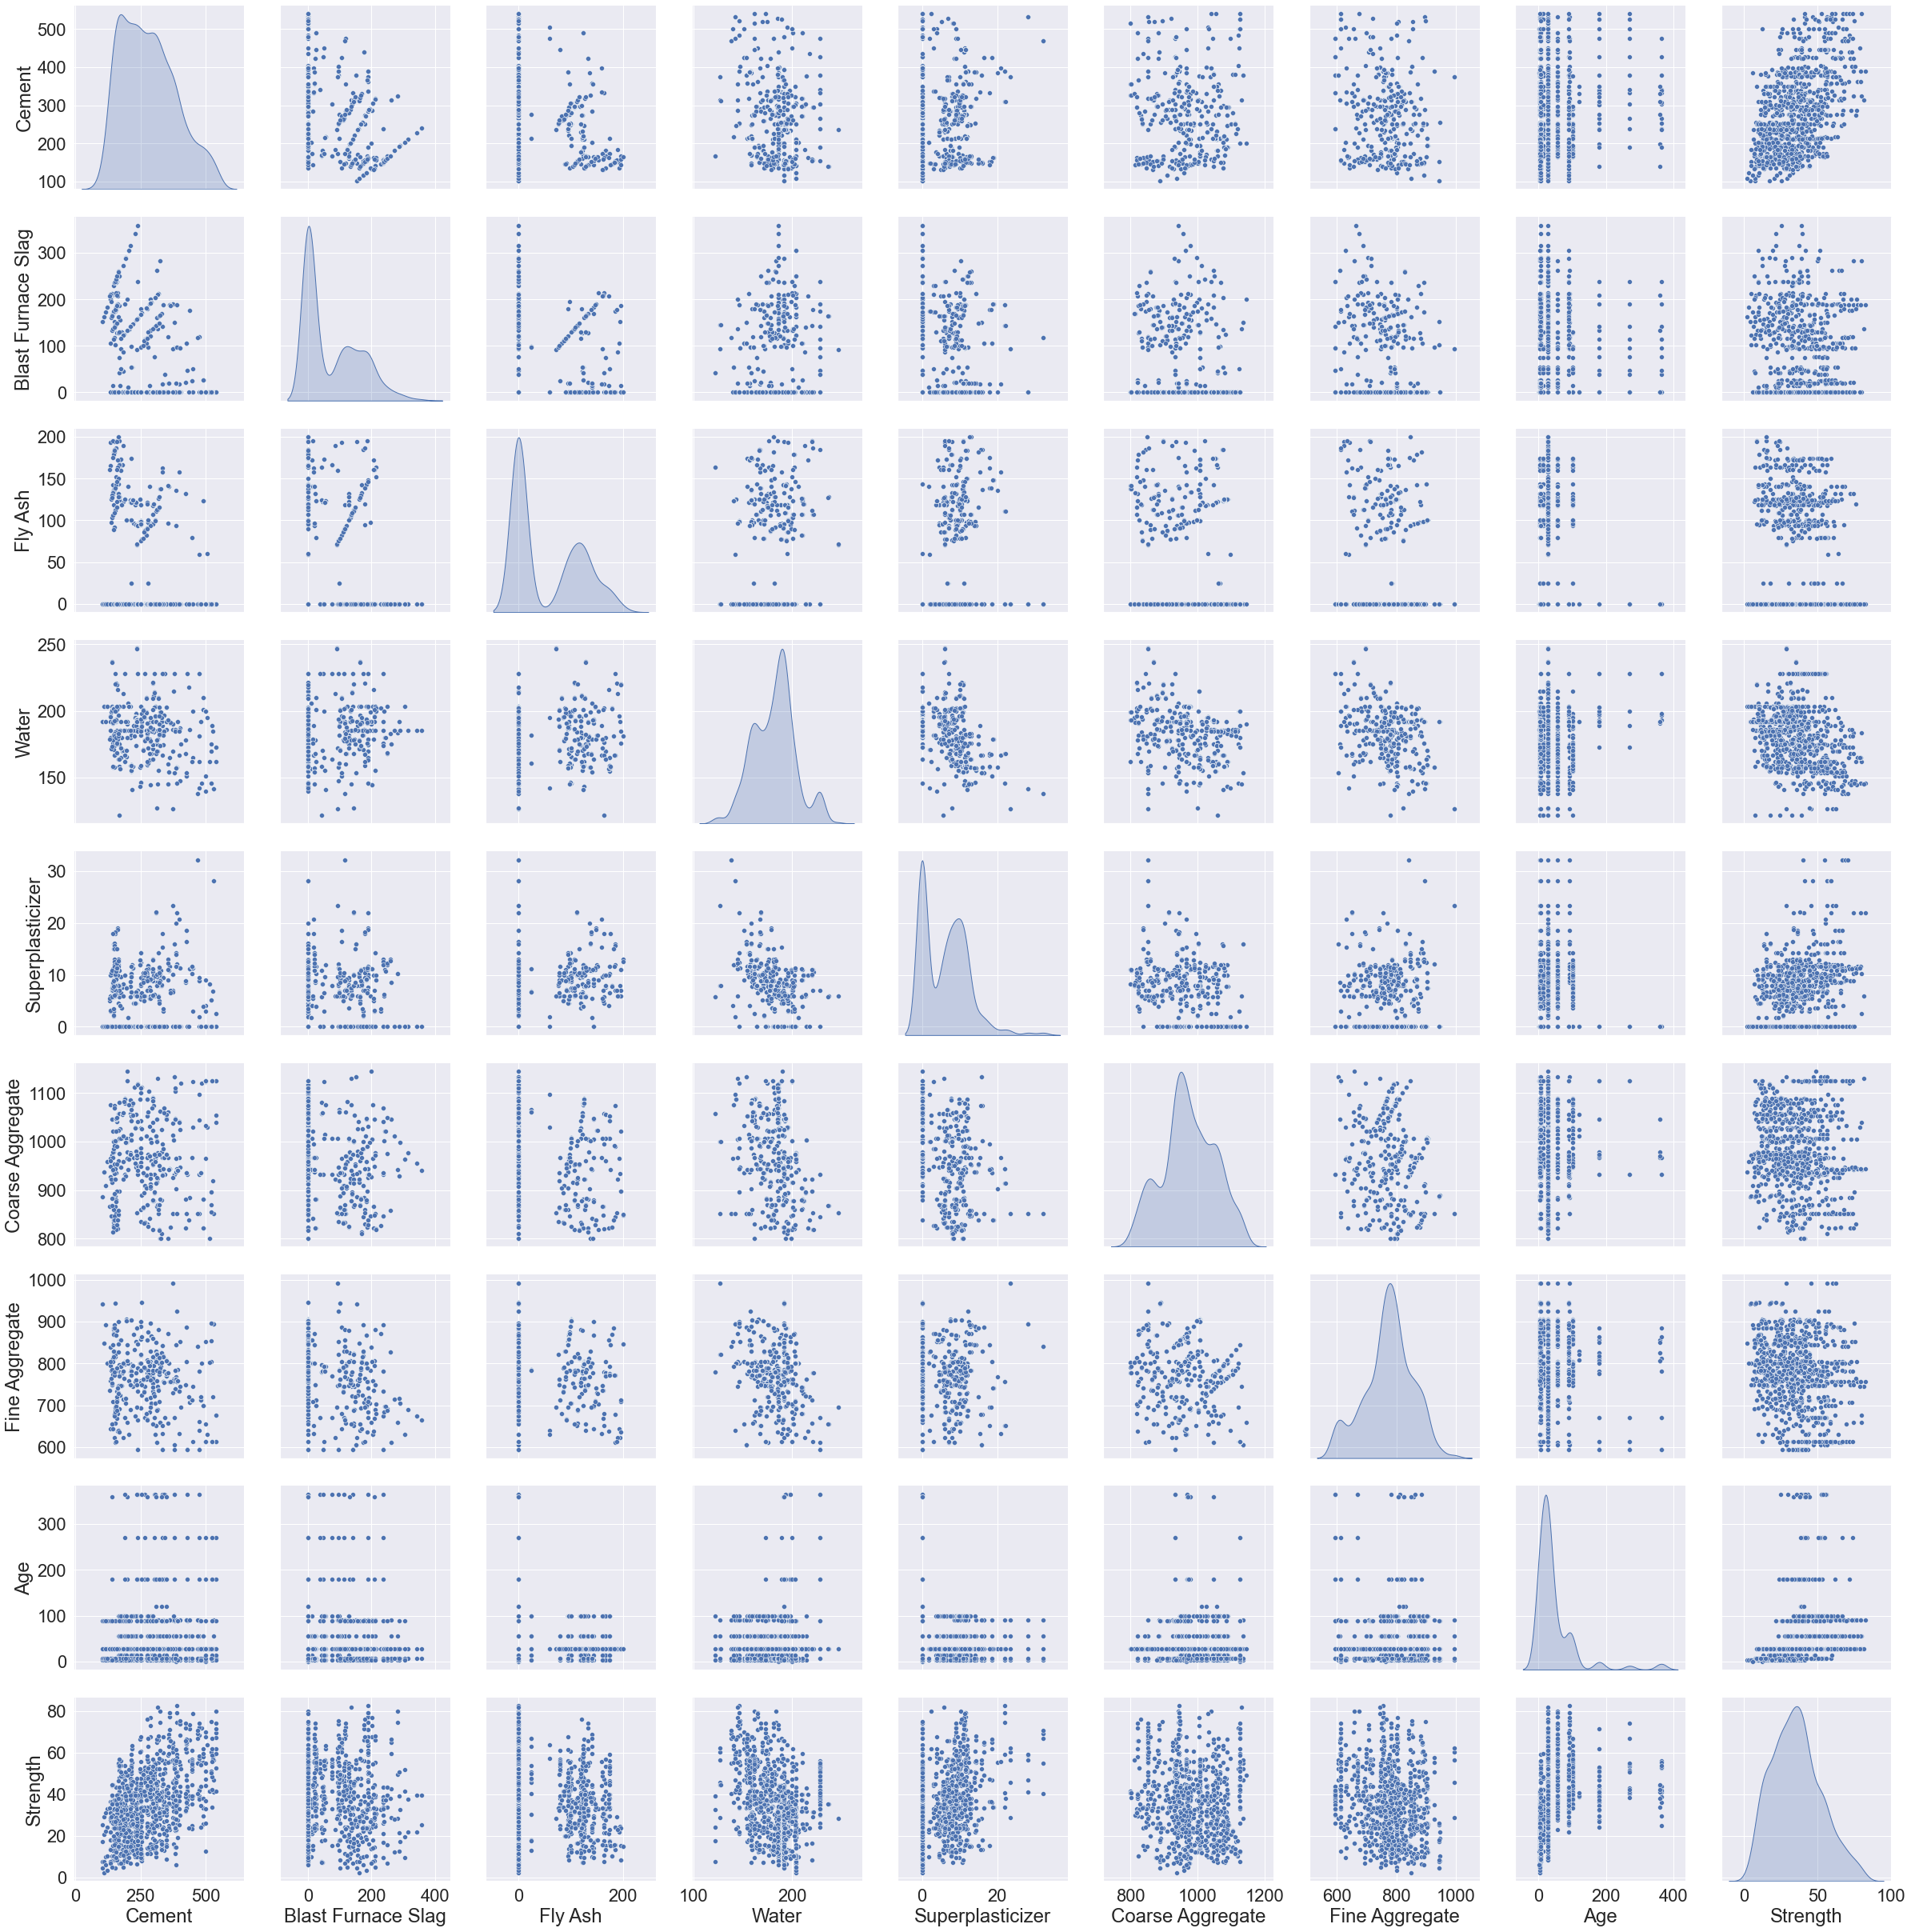

In [21]:
sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=2)
graph = sns.pairplot(dataset, kind='scatter', diag_kind='kde')
graph.fig.set_size_inches(35,35)

## Summary:
* 'Cement' and 'Strength' shows a postivie correlation with the data scattered on the right.
* 'Blast Furnace Slag' , 'Fly Ash' , 'Water' , 'Superplasticizer' , 'Coarse Aggregate' , 'Fine Aggregate' have multiple gussians, will do PCA analysis to form clusters.(it causes Multicollinearity, we will check it.)
* 'Age' shows a quite a number of gaussians.
* 'Strength' correlation with the different attribute is more scattered, which suggest that any of the feature need not to be removed.
* 'Water' and 'Superplasticizer' shows a negative correlation.

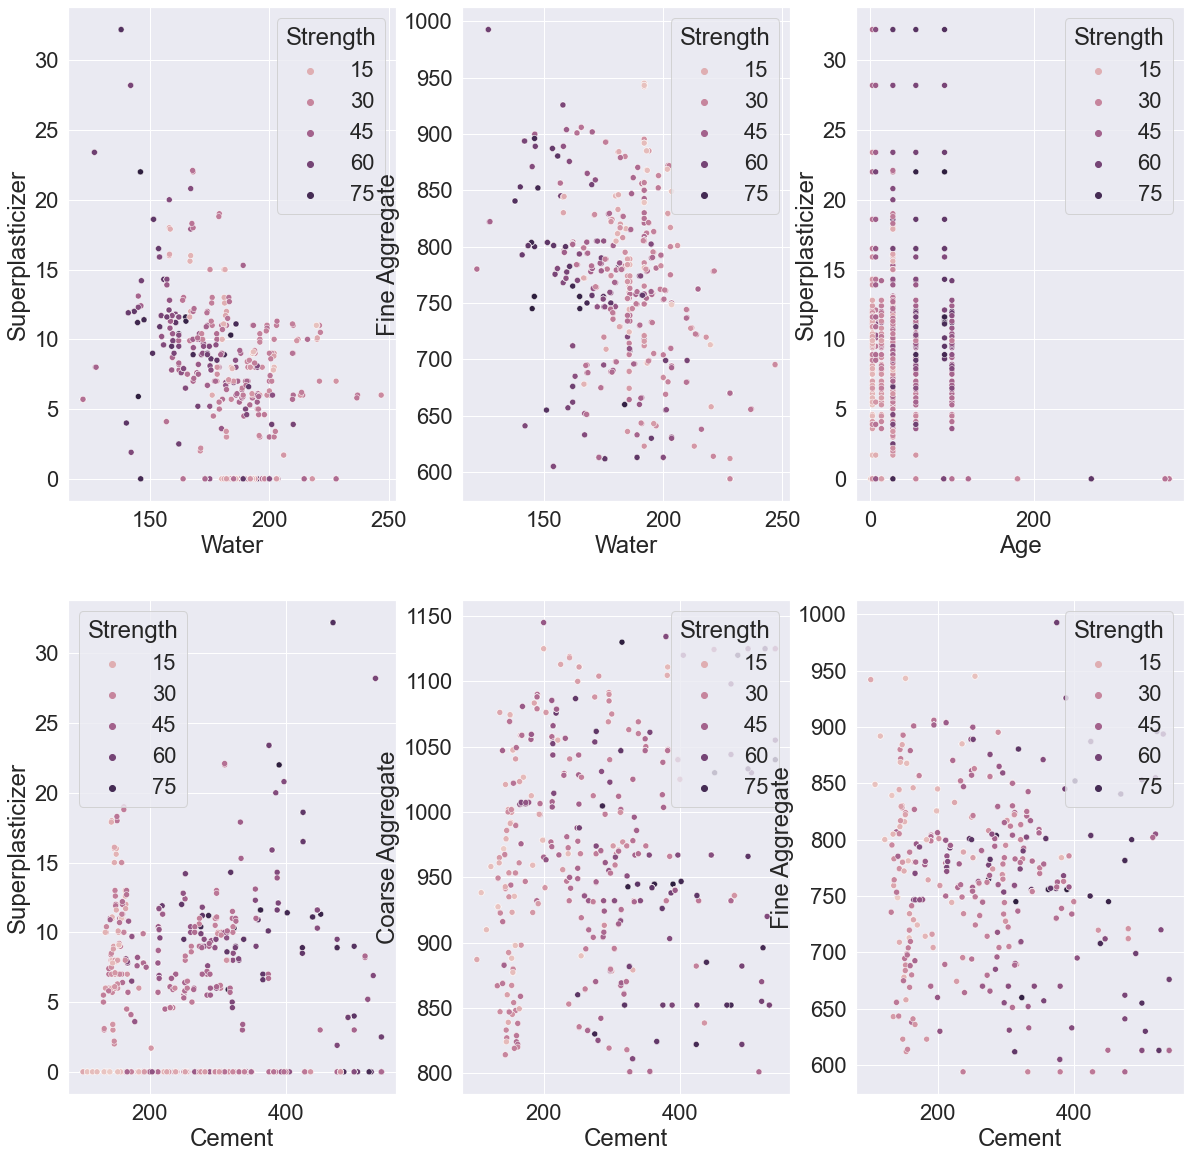

In [23]:
fig, axis = plt.subplots(2, 3, figsize=(20, 20), sharex=False)

sns.scatterplot(data=dataset,x='Water',y='Superplasticizer',hue='Strength', ax=axis[0,0])
sns.scatterplot(data=dataset,x='Water',y='Fine Aggregate',hue='Strength',ax=axis[0,1])
sns.scatterplot(data=dataset,x='Age',y='Superplasticizer',hue='Strength',ax=axis[0,2])

sns.scatterplot(data=dataset,x='Cement',y='Superplasticizer',hue='Strength',ax=axis[1,0])
sns.scatterplot(data=dataset,x='Cement',y='Coarse Aggregate',hue='Strength',ax=axis[1,1])
sns.scatterplot(data=dataset,x='Cement',y='Fine Aggregate',hue='Strength',ax=axis[1,2])

plt.show()

## Summary:
* As discussed earlier 'Water' and 'Superplasticizer' have negative correlation, moreover more the water lesser the Superplasticizer and strength.
* 'Cement' and 'Coarse Aggregate' has interesting correlation higher cement and mid less to higher the coarse the stronger it gets, even with higher 'Coarse Aggregate' with lesser 'Cement' the strength is always lower.
* The age is little strange, higher age value also shows lower superplastic and strength.

## Outliers Analysis:

In [24]:
dataset.Age.max()

365

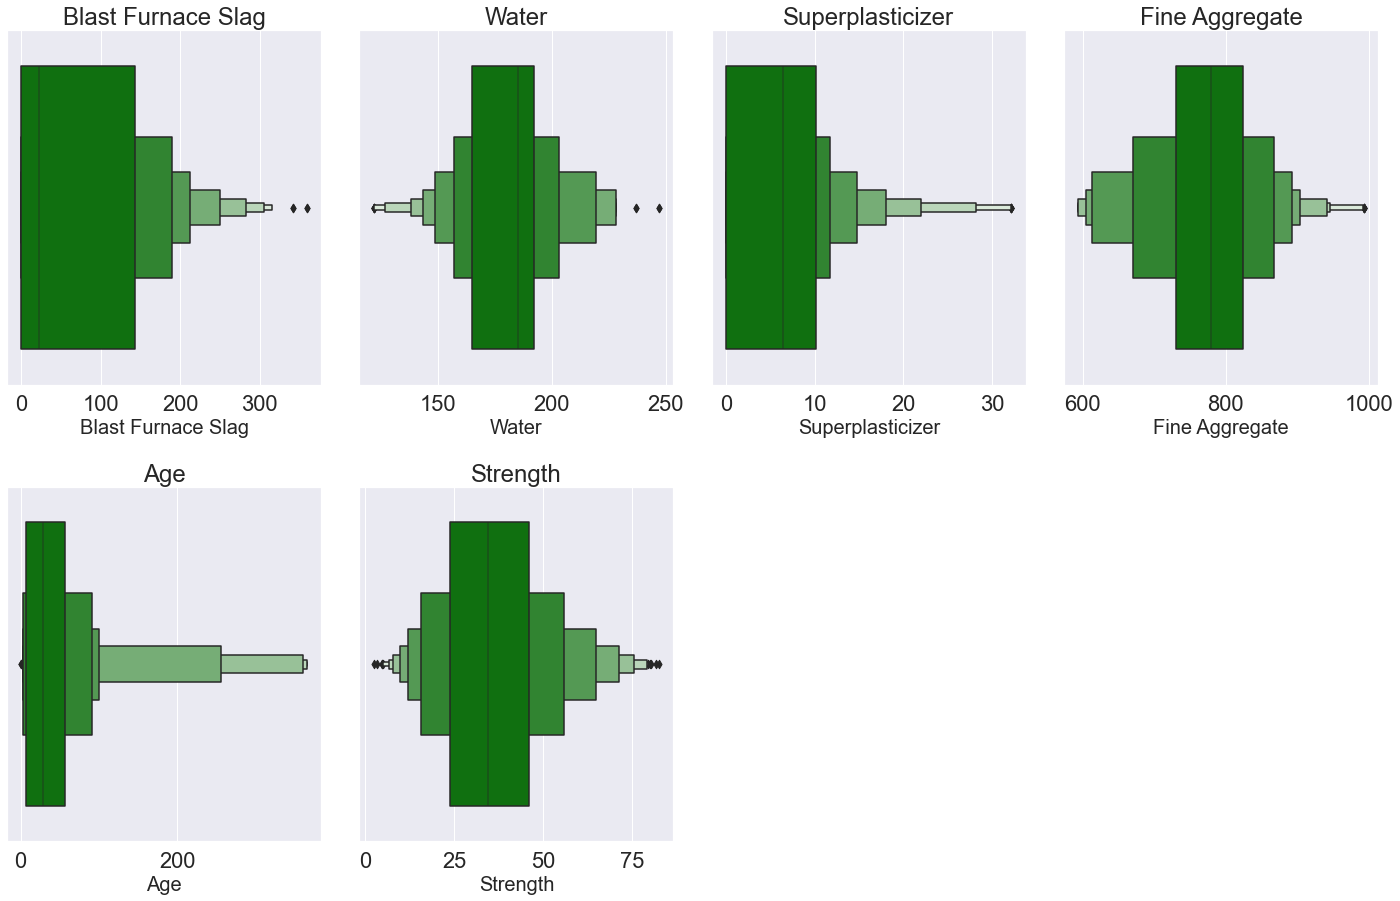

In [25]:
features_outliers = dataset[['Blast Furnace Slag','Water','Superplasticizer','Fine Aggregate','Age','Strength']]

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for feature in features_outliers:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxenplot(x = features_outliers[feature],color='green')
        plt.xlabel(feature, fontsize=20)
        plt.title(feature)
    plotnumber+=1
plt.tight_layout()

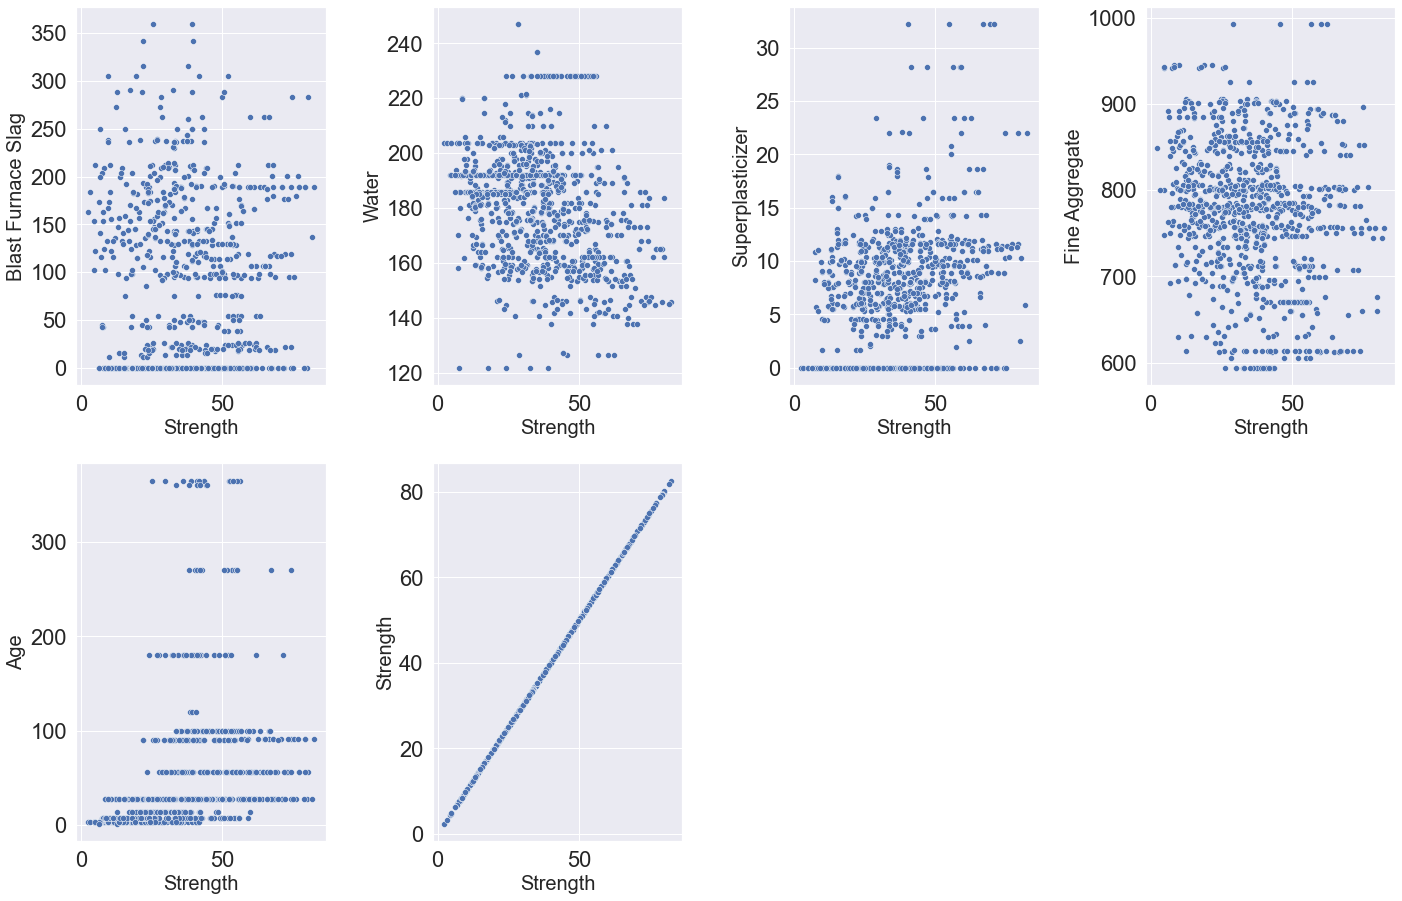

In [26]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for feature in features_outliers:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x = features_outliers['Strength'], y = features_outliers[feature])
        plt.xlabel('Strength', fontsize=20)
        plt.ylabel(feature, fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [27]:
def identify_outliers(data_column):
    df = pd.DataFrame(data_column)
    quar1 = df.quantile(0.25)
    quar3 = df.quantile(0.75)
    IQR = quar3 - quar1
    return((df < (quar1-1.5*IQR)) | (df > (quar3+1.5*IQR))).sum()

data_columns = dataset.columns
print("\n Number of the outliers in each attributes \n")
for (colName, colData) in dataset.iteritems():
    print(identify_outliers(dataset[colName]))


 Number of the outliers in each attributes 

Cement    0
dtype: int64
Blast Furnace Slag    2
dtype: int64
Fly Ash    0
dtype: int64
Water    9
dtype: int64
Superplasticizer    10
dtype: int64
Coarse Aggregate    0
dtype: int64
Fine Aggregate    5
dtype: int64
Age    59
dtype: int64
Strength    4
dtype: int64


In [28]:
def extreme_outliers(dataframe, feature):
    IQR = dataframe[feature].quantile(0.75) - dataframe[feature].quantile(0.25)
    ub = dataframe[feature].quantile(0.75)+(IQR*3)
    lb = dataframe[feature].quantile(0.25)-(IQR*3)
    return print("Upper Boundary : {}" .format(ub)), print("Lower Boundary : {}" .format(lb))

In [29]:
print ("\n Feature : Age \n",'-'*20, sep='')
print(extreme_outliers(features_outliers,'Age'))


 Feature : Age 
--------------------
Upper Boundary : 203.0
Lower Boundary : -140.0
(None, None)


In [30]:
dataset.loc[dataset['Age']>=203, 'Age']=203

In [31]:
dataset.Age.max()

203

## Summary:
1. features 'Blast Furnace Slag','Water','Superplasticizer','Fine Aggregate','Age','Strength' have a outliers in the dataset.
2. The outliers for the 'Fine Aggergate' looks to be nominal hence not altering those attribute.
3. Blast Furnace Slag and Superplasticizer have a large zero values as well as outliers, so it might be possible that the       outliers are caused by zero values only, hence it is required zero value treatment.
4. Age has a very large amount of outliers.
5. water and Strength looks to be more even a little of the values in lower and uper whiskers, leaving them intact.
6. Done a scatter plot to look into the attribute which has the higher number of outliers 'Superplasticizer' , 'Water' , 'Age'.

## Treating Zero values:

In [32]:
zeros_feature = dataset.columns
for col in zeros_feature:
    print(f" Zero in {col} : {(dataset[col]==0).sum()}")

 Zero in Cement : 0
 Zero in Blast Furnace Slag : 471
 Zero in Fly Ash : 566
 Zero in Water : 0
 Zero in Superplasticizer : 379
 Zero in Coarse Aggregate : 0
 Zero in Fine Aggregate : 0
 Zero in Age : 0
 Zero in Strength : 0


In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=0, strategy='median')
imputer.fit(dataset)

med_dataset = pd.DataFrame(imputer.transform(dataset), columns=['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age','Strength'])

print('\nZeros in each of the feature\n','-'*30, sep='')
for col in med_dataset:
    print(f" Zero in {col} : {(med_dataset[col]==0).sum()}")


Zeros in each of the feature
------------------------------
 Zero in Cement : 0
 Zero in Blast Furnace Slag : 0
 Zero in Fly Ash : 0
 Zero in Water : 0
 Zero in Superplasticizer : 0
 Zero in Coarse Aggregate : 0
 Zero in Fine Aggregate : 0
 Zero in Age : 0
 Zero in Strength : 0


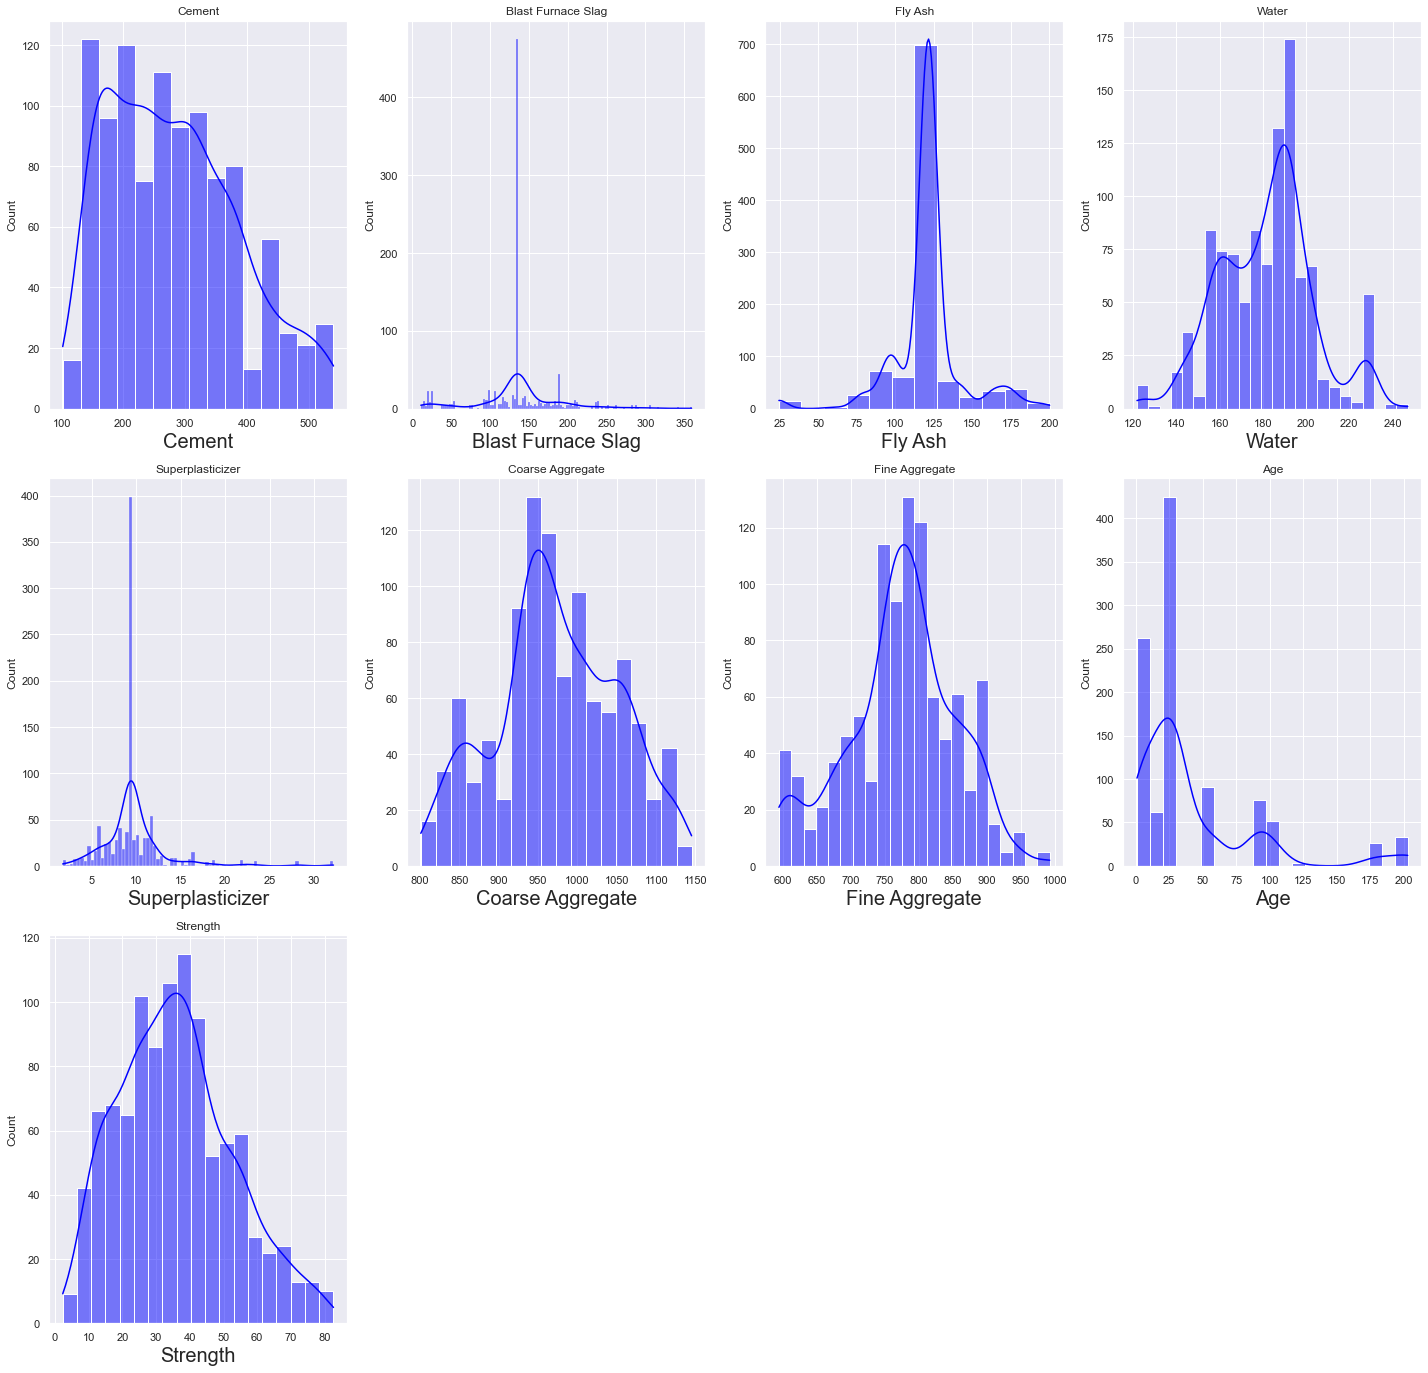

In [34]:
sns.set_theme(style='darkgrid', palette='deep')
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in med_dataset.columns:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x = med_dataset[column], kde=True, color='blue')
        plt.xlabel(column, fontsize=20)
        plt.title(column)
    plotnumber+=1
plt.tight_layout()

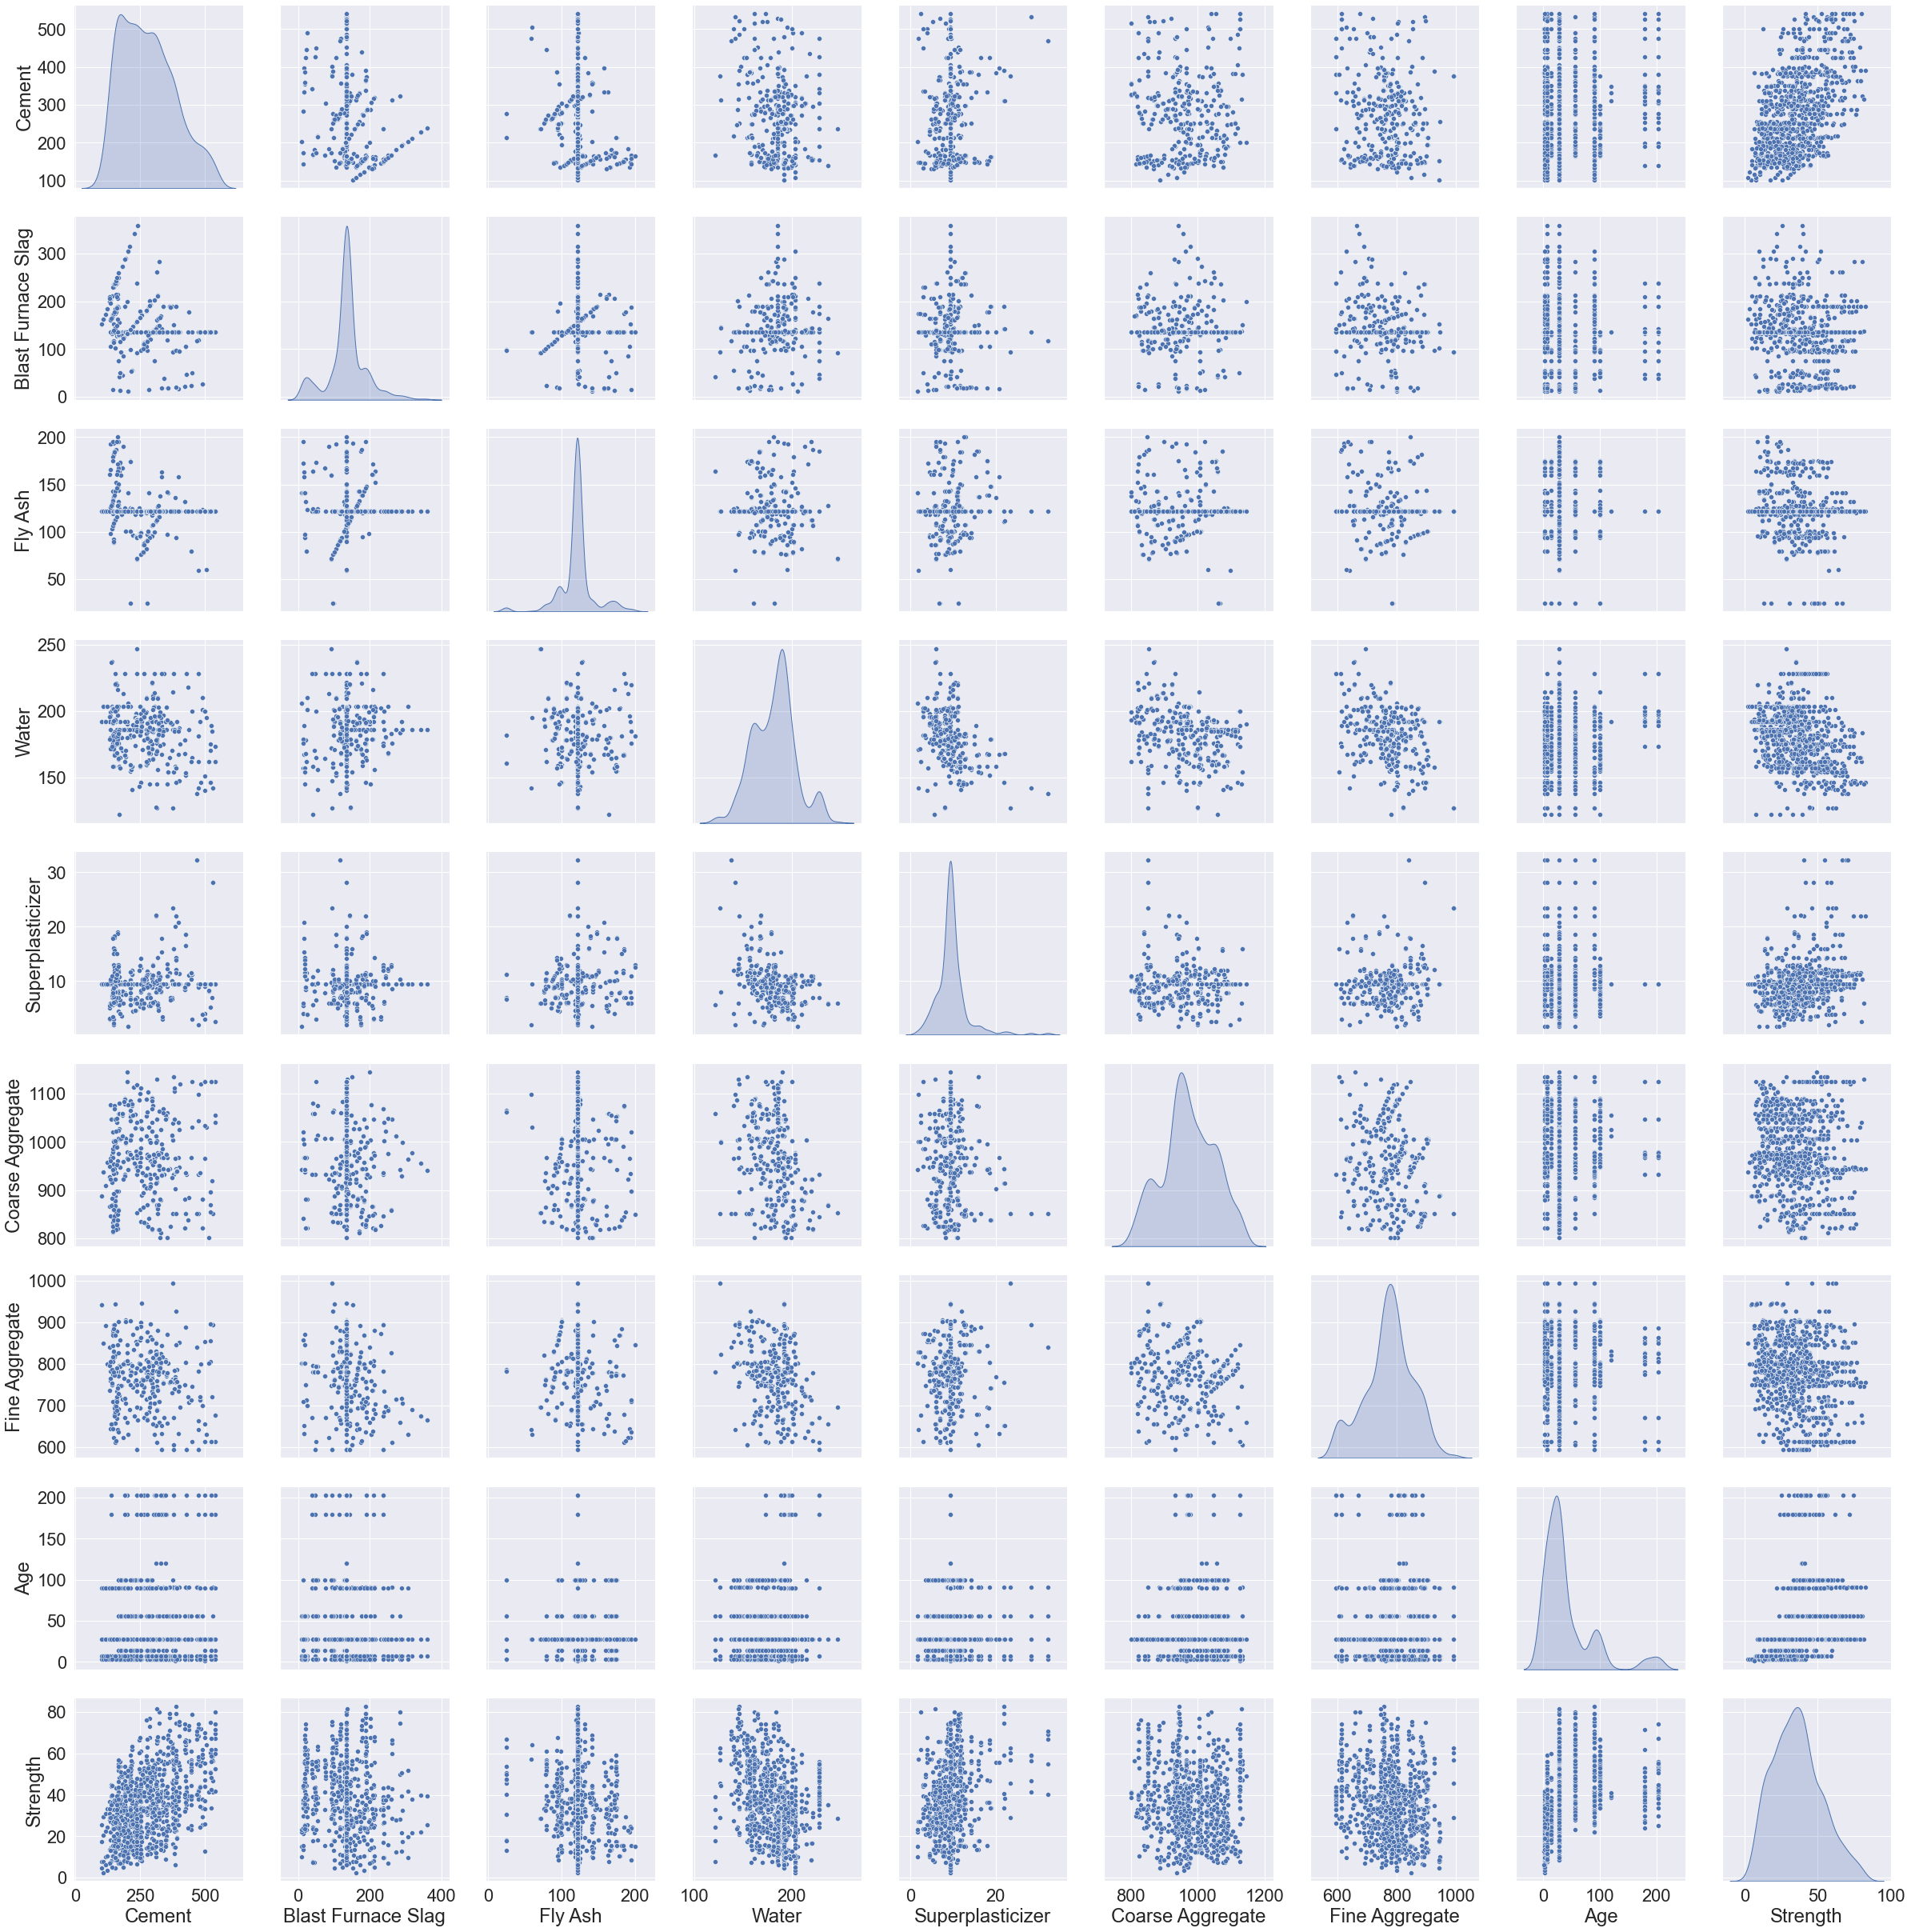

In [35]:
sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=2)
graph = sns.pairplot(med_dataset, kind='scatter', diag_kind='kde')
graph.fig.set_size_inches(35,35)

## Summary:

1. we had a large value of zeros in Blast Furnace Slag, Fly Ash, Superplasticizer.
2. to resolve this issue we have imputed median with zero.
3. after imputation in Blast Furnace Slag, Fly Ash, Superplasticizer distribution of all of these three become more normal and all the zero values has removed.

## Checking For Multicollinearity:

In [36]:
med_dataset.describe().T

count        mean         std     min      25%      50%  \
Cement              1030.0  281.167864  104.506364  102.00  192.375  272.900   
Blast Furnace Slag  1030.0  135.948932   53.279837   11.00  129.800  135.700   
Fly Ash             1030.0  120.899417   22.595744   24.50  121.400  121.400   
Water               1030.0  181.567282   21.354219  121.80  164.900  185.000   
Superplasticizer    1030.0    9.663495    3.645923    1.70    8.200    9.400   
Coarse Aggregate    1030.0  972.918932   77.753954  801.00  932.000  968.000   
Fine Aggregate      1030.0  773.580485   80.175980  594.00  730.950  779.500   
Age                 1030.0   41.700000   46.574937    1.00    7.000   28.000   
Strength            1030.0   35.817961   16.705742    2.33   23.710   34.445   

                         75%     max  
Cement               350.000   540.0  
Blast Furnace Slag   142.950   359.4  
Fly Ash              121.400   200.1  
Water                192.000   247.0  
Superplasticizer      10.200    32.2  
Coarse Aggregate    1029.400  1145.0  
Fine Aggregate       824.000   992.6  
Age                   56.000   203.0  
Strength              46.135    82.6

In [37]:
med_dataset

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0               135.7    121.4  162.0               2.5   
1      540.0               135.7    121.4  162.0               2.5   
2      332.5               142.5    121.4  228.0               9.4   
3      332.5               142.5    121.4  228.0               9.4   
4      198.6               132.4    121.4  192.0               9.4   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2               135.7    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7    121.4  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate    Age  Strength  
0               1040.0           676.0   28.0     79.99  
1               1055.0           676.0   28.0     61.89  
2                932.0           594.0  203.0     40.27  
3                932.0           594.0  203.0     41.05  
4                978.4           825.5  203.0     44.30  
...                ...             ...    ...       ...  
1025             870.1           768.3   28.0     44.28  
1026             817.9           813.4   28.0     31.18  
1027             892.4           780.0   28.0     23.70  
1028             989.6           788.9   28.0     32.77  
1029             864.5           761.5   28.0     32.40  

[1030 rows x 9 columns]

In [38]:
y = med_dataset['Strength']
X = med_dataset.drop(columns=['Strength'])

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [41]:
vif

VIF            Features
0  1.486505              Cement
1  1.204562  Blast Furnace Slag
2  1.108267             Fly Ash
3  2.018300               Water
4  1.499049    Superplasticizer
5  1.319031    Coarse Aggregate
6  1.713750      Fine Aggregate
7  1.109029                 Age

## Summary:
Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go.

Great. Let's go ahead and use linear regression and see how good it fits our data. But first. let's split our data in train and test.

Cement


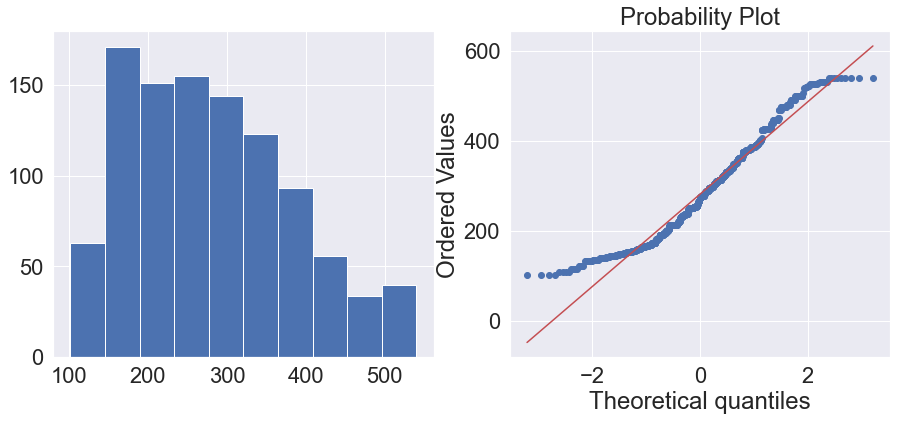

Blast Furnace Slag


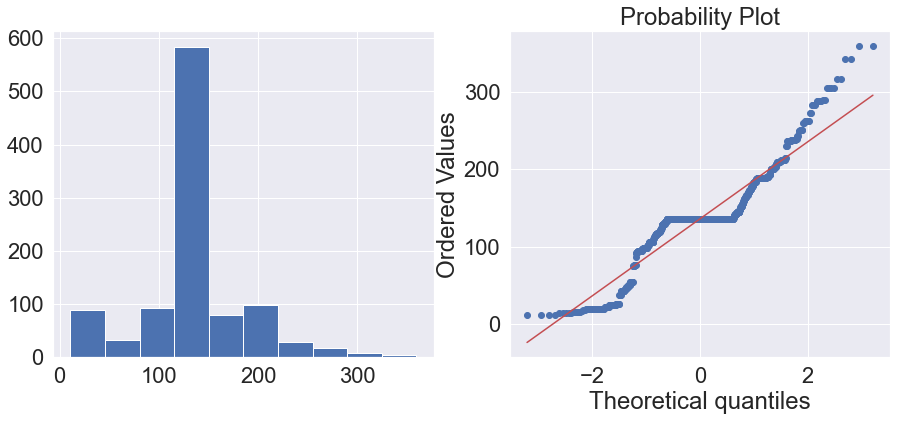

Fly Ash


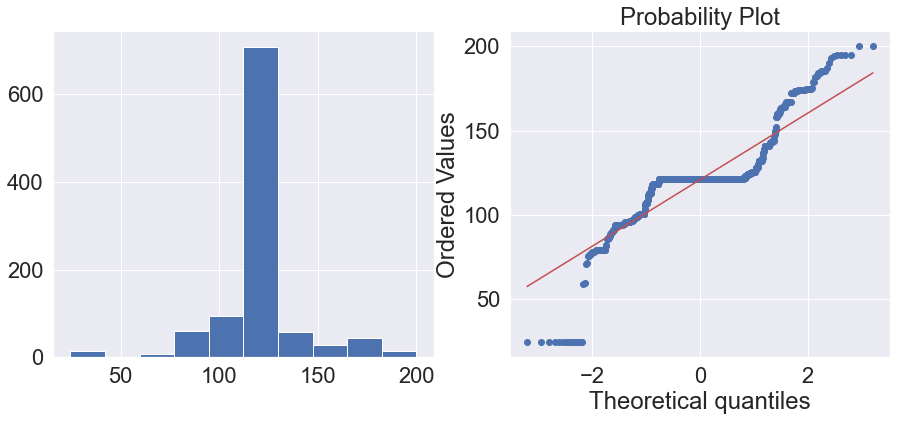

Water


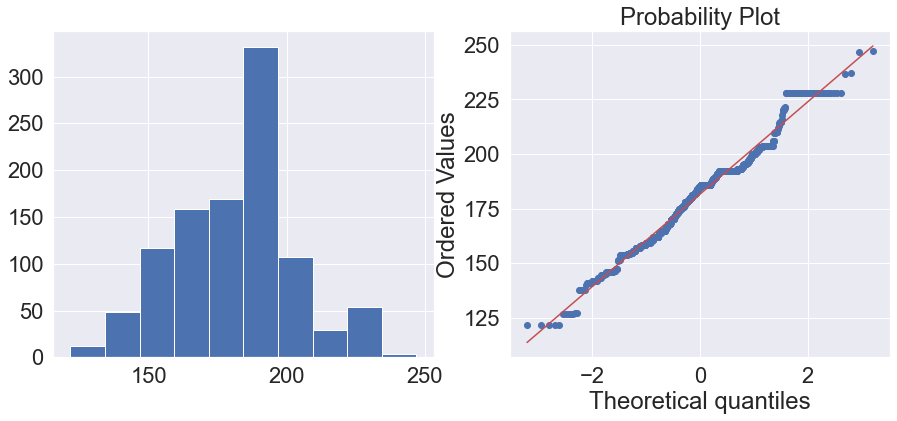

Superplasticizer


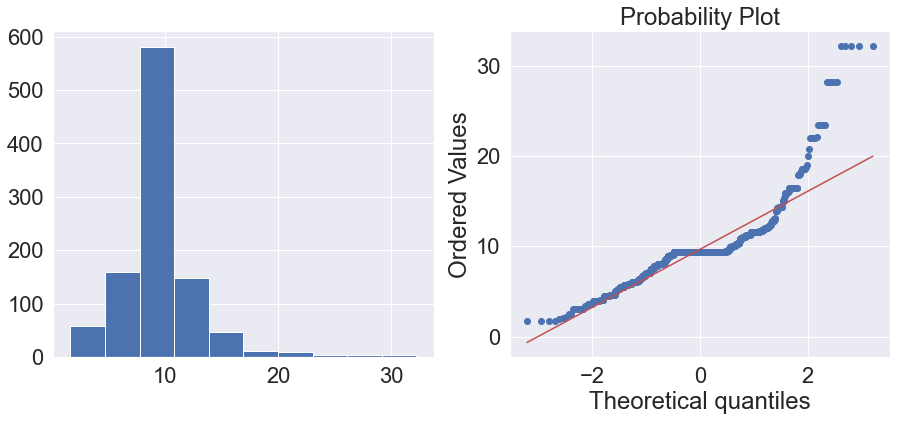

Coarse Aggregate


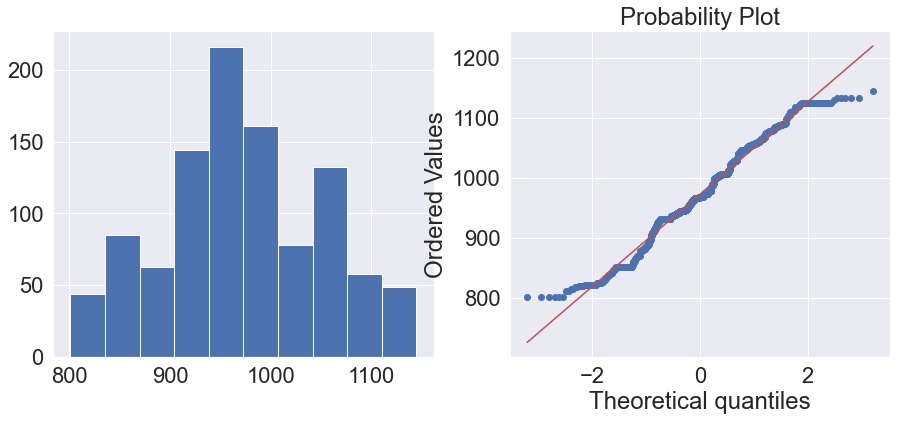

Fine Aggregate


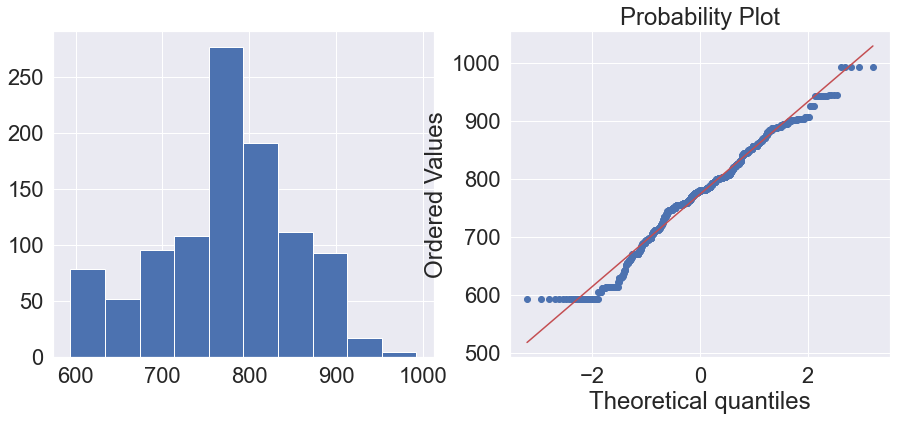

Age


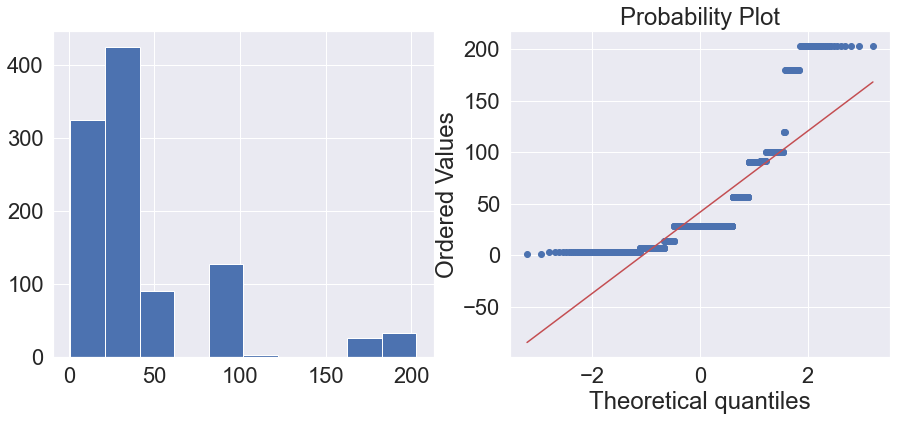

Strength


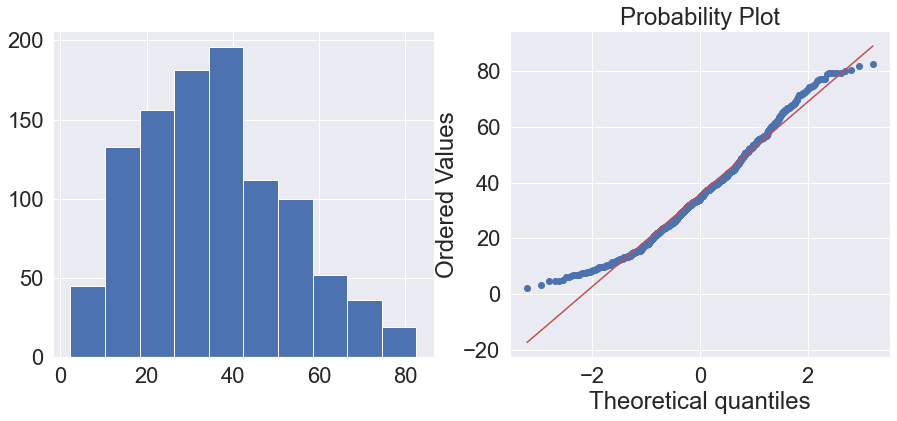

In [43]:
import scipy.stats as stats 

for column in med_dataset.columns:
    print(column)
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    med_dataset[column].hist()
    plt.subplot(1,2,2)
    stats.probplot(med_dataset[column], dist='norm', plot=plt)
    plt.show()

In [52]:
def plot_data(dataset,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    dataset[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(dataset[feature],dist='norm',plot=plt)
    plt.show()

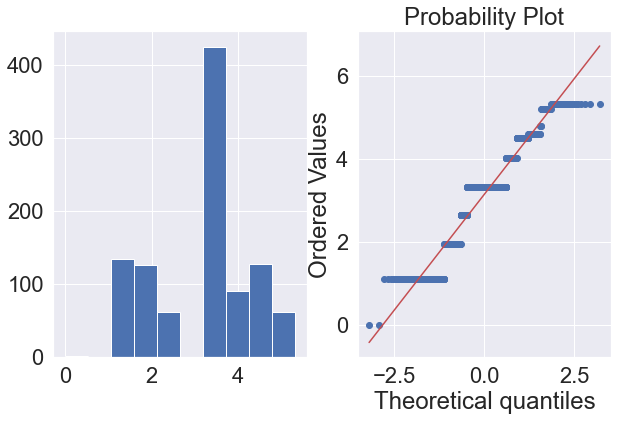

In [53]:
## logrithmic Transformation
med_dataset['Age_log'] = np.log(med_dataset['Age'])
plot_data(med_dataset,'Age_log')

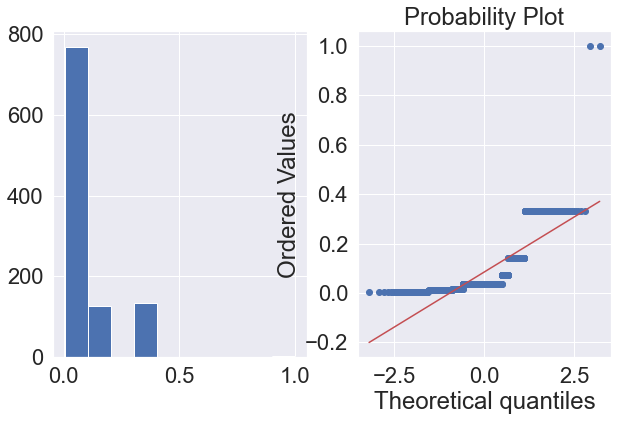

In [54]:
## Reciprocal Transformation
med_dataset['Age_rec'] = 1/med_dataset.Age
plot_data(med_dataset, 'Age_rec')

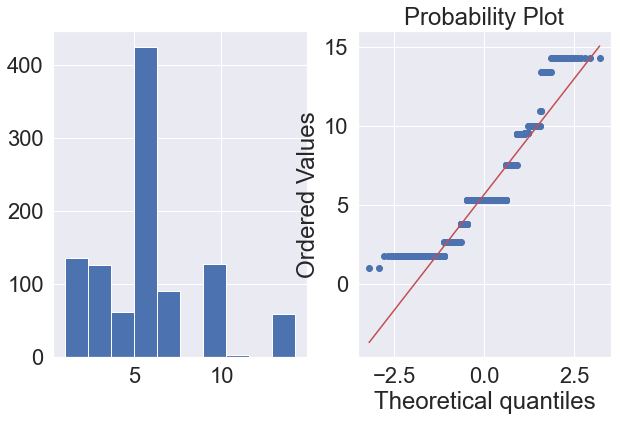

In [55]:
## Sq Root Transformation
med_dataset['Age_sq'] = med_dataset.Age**(1/2)
plot_data(med_dataset, 'Age_sq')

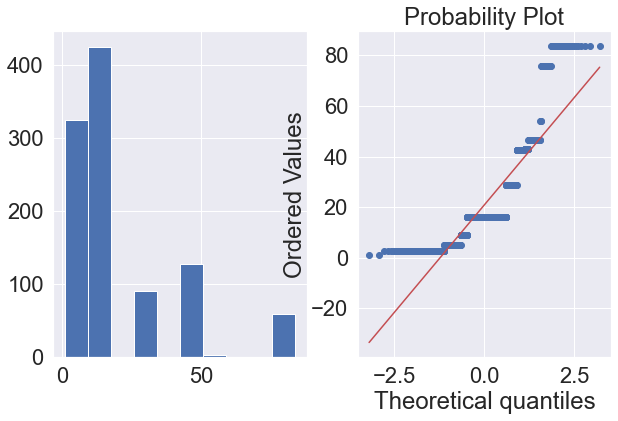

In [56]:
## Exponential Tranformation
med_dataset['Age_exp'] = med_dataset.Age**(1/1.2)
plot_data(med_dataset, 'Age_exp')

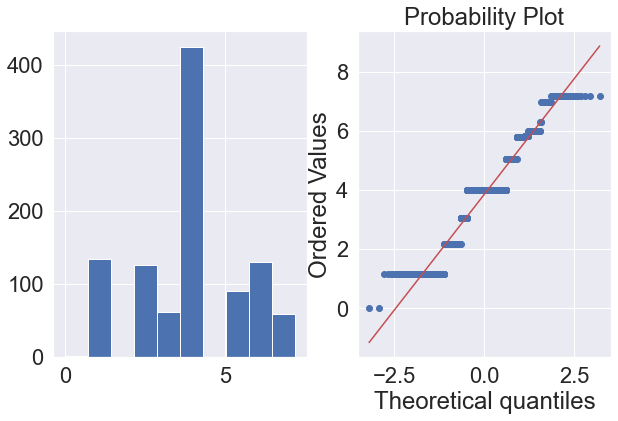

0.10901181606080287


In [57]:
## Box-Cox Tranformation 
med_dataset['Age_bcx'], parameters = stats.boxcox(med_dataset['Age'])
plot_data(med_dataset, 'Age_bcx')
print(parameters)

## Summary:
1. from the QQ-plot it is clear that Age feature have a skewness in the distribution because of that we are not able to cover data points with QQ plot, to remove it we did various transformations.
2. out of that in Box-Cox transformation we obtained good kind of distribution and we are able to cover the data points using probability plot.

In [60]:
med_dataset = med_dataset.drop(columns=['Age','Age_log','Age_rec', 'Age_sq', 'Age_exp'], axis=1)

In [63]:
med_dataset = med_dataset.rename(columns={'Age_bcx':'Age'})
med_dataset

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0               135.7    121.4  162.0               2.5   
1      540.0               135.7    121.4  162.0               2.5   
2      332.5               142.5    121.4  228.0               9.4   
3      332.5               142.5    121.4  228.0               9.4   
4      198.6               132.4    121.4  192.0               9.4   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2               135.7    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7    121.4  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Strength       Age  
0               1040.0           676.0     79.99  4.017866  
1               1055.0           676.0     61.89  4.017866  
2                932.0           594.0     40.27  7.197515  
3                932.0           594.0     41.05  7.197515  
4                978.4           825.5     44.30  7.197515  
...                ...             ...       ...       ...  
1025             870.1           768.3     44.28  4.017866  
1026             817.9           813.4     31.18  4.017866  
1027             892.4           780.0     23.70  4.017866  
1028             989.6           788.9     32.77  4.017866  
1029             864.5           761.5     32.40  4.017866  

[1030 rows x 9 columns]

In [70]:
y = med_dataset[['Strength']]
X = med_dataset.drop(columns=['Strength'], axis=1)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=160)
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape)

(721, 8)
(309, 8)
(721, 1)
(309, 1)


In [81]:
med_dataset

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0               135.7    121.4  162.0               2.5   
1      540.0               135.7    121.4  162.0               2.5   
2      332.5               142.5    121.4  228.0               9.4   
3      332.5               142.5    121.4  228.0               9.4   
4      198.6               132.4    121.4  192.0               9.4   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2               135.7    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7    121.4  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Strength       Age  
0               1040.0           676.0     79.99  4.017866  
1               1055.0           676.0     61.89  4.017866  
2                932.0           594.0     40.27  7.197515  
3                932.0           594.0     41.05  7.197515  
4                978.4           825.5     44.30  7.197515  
...                ...             ...       ...       ...  
1025             870.1           768.3     44.28  4.017866  
1026             817.9           813.4     31.18  4.017866  
1027             892.4           780.0     23.70  4.017866  
1028             989.6           788.9     32.77  4.017866  
1029             864.5           761.5     32.40  4.017866  

[1030 rows x 9 columns]

In [82]:
med_dataset.to_csv('Preprocessed_Strength.csv')